In [2]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model =Sequential()

In [6]:
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(10))
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(3))
model.add(Dense(1))

In [7]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

In [9]:
x_in = Input(shape=(8,))
x1=Dense(10)(x_in)
x2=Dense(10)(x1)
x3=Dense(10)(x2)
x_out=Dense(1)(x3)
model=Model(inputs=x_in,outputs=x_out)

# Keras Sequential API EXAMPLE :MNIST Dataset

In [39]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.utils import to_categorical,plot_model

In [40]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [41]:
unique,counts=np.unique(y_test, return_counts=True)
print("test has",dict(zip(unique,counts)))

test has {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [42]:
unique,counts=np.unique(y_train, return_counts=True)
print("train has",dict(zip(unique,counts)))

train has {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [43]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images=x_train[indexes]
labels=y_train[indexes]


In [44]:
labels

array([4, 2, 9, 8, 8, 6, 6, 8, 9, 7, 4, 4, 0, 1, 0, 2, 7, 8, 0, 1, 0, 5,
       3, 2, 5], dtype=uint8)

In [56]:
num_labels=len(np.unique(labels))
num_labels

10

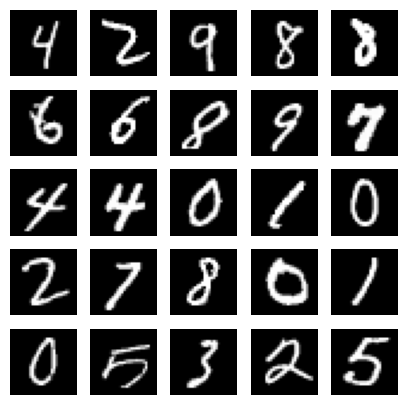

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [46]:
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [47]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_train.shape[1]

28

In [50]:
x_train[1:].max()

255

In [52]:
image_size=x_train.shape[1]
input_size=image_size*image_size
x_train=np.reshape(x_train,[-1,input_size])
x_train=x_train.astype('float32')/255
x_test=np.reshape(x_test,[-1,input_size])
x_test=x_test.astype('float32')/255

In [53]:
batch_size=128
hidden_units=256
dropout=0.45

In [54]:
model=Sequential()

In [57]:
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

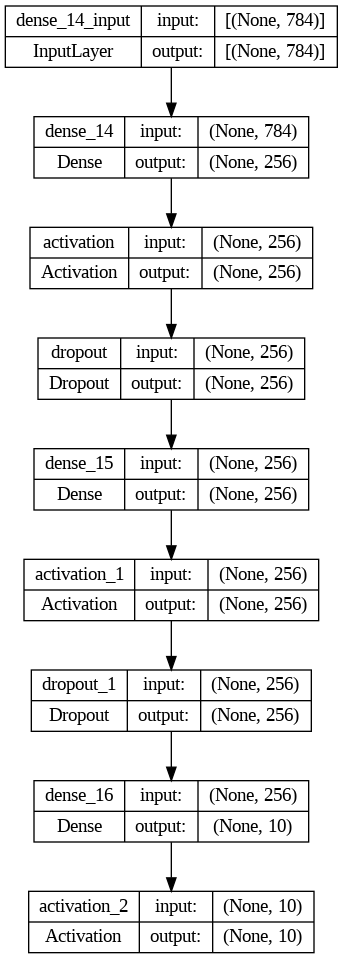

In [59]:
plot_model(model,to_file='mlp.mnist.png',show_shapes=True)

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.4265 - accuracy: 0.8688
Epoch 2/20
469/469 [==============================] - 4s 7ms/step - loss: 0.1940 - accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1500 - accuracy: 0.9552
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1257 - accuracy: 0.9623
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1124 - accuracy: 0.9662
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1008 - accuracy: 0.9686
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0925 - accuracy: 0.9706
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0842 - accuracy: 0.9732
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0800 - accuracy: 0.9741
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0778 - accuracy: 0.975

In [62]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 1s 5ms/step - loss: 0.0623 - accuracy: 0.9820


In [63]:
from tensorflow.keras.regularizers import l2
model.add(Dense(hidden_units,kernel_regularizer=l2(0.001),input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [64]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.3661 - accuracy: 0.9650
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1392 - accuracy: 0.9789
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1253 - accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1127 - accuracy: 0.9801
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0929 - accuracy: 0.9814
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0937 - accuracy: 0.9811
Epoch 8/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0904 - accuracy: 0.9813
Epoch 9/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0844 - accuracy: 0.9822
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0847 - accuracy: 0

In [66]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9839


In [ ]:
# 79/79 [==============================] - 1s 5ms/step - loss: 0.0623 - accuracy: 0.9820

## Keras Functional API EXAMPLE : Fashion MNIST Dataset

In [70]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.utils import to_categorical,plot_model

from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [71]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [72]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [73]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [78]:
class_names = ["T-shirt/top","Trouser","Pullover",
"Dress","Coat","Sandal","Shirt","Sneaker",
"Bag","Ankle Boot"]

In [74]:
unique,counts=np.unique(y_test, return_counts=True)
print("test has",dict(zip(unique,counts)))

test has {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [75]:
unique,counts=np.unique(y_train, return_counts=True)
print("train has",dict(zip(unique,counts)))

train has {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


[9 3 6 6 0 7 8 1 8 3 2 7 5 5 5 4 0 0 5 9 2 0 2 0 3]


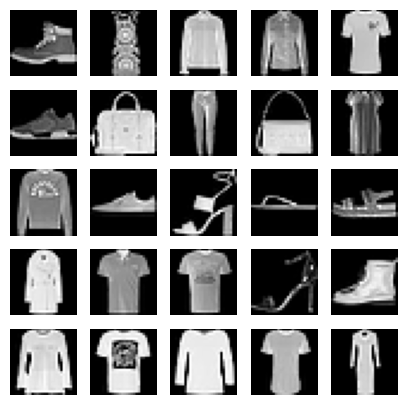

In [80]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images=x_train[indexes]
labels=y_train[indexes]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [81]:
for i in labels:
  print(class_names[i])

Ankle Boot
Dress
Shirt
Shirt
T-shirt/top
Sneaker
Bag
Trouser
Bag
Dress
Pullover
Sneaker
Sandal
Sandal
Sandal
Coat
T-shirt/top
T-shirt/top
Sandal
Ankle Boot
Pullover
T-shirt/top
Pullover
T-shirt/top
Dress


In [82]:
input_shape=(x_train.shape[1:]+(1,))
num_classes=len(np.unique(y_train))
num_classes

10

In [83]:
input_shape

(28, 28, 1)

In [84]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [92]:
input_=keras.layers.Input(shape=input_shape)
batchnorm=keras.layers.BatchNormalization()(input_)
layer1= keras.layers.Dense(units=128,activation='relu')(batchnorm)
dropout1 = keras.layers.Dropout(0.2)(layer1)
layer2= keras.layers.Dense(units=128,activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(layer2)
flatten=keras.layers.Flatten()(dropout2)
layer4= keras.layers.Dense(units=128,activation='relu')(flatten)
layer3= keras.layers.Dense(units=128,activation='relu')(layer4)
output = keras.layers.Dense(units=num_classes,activation='softmax')(layer3)
model = keras.Model( inputs =[input_],outputs =[output])

In [103]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 dense_28 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 dropout_7 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 dense_29 (Dense)            (None, 28, 28, 128)       16512     
                                                                 
 dropout_8 (Dropout)         (None, 28, 28, 128)       0         
                                                           

In [104]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [105]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 532s 566ms/step - loss: 0.4183 - accuracy: 0.8479
Epoch 2/5
938/938 [==============================] - 486s 518ms/step - loss: 0.3351 - accuracy: 0.8757
Epoch 3/5
938/938 [==============================] - 495s 528ms/step - loss: 0.2967 - accuracy: 0.8880
Epoch 4/5
938/938 [==============================] - 497s 530ms/step - loss: 0.2689 - accuracy: 0.8990
Epoch 5/5
938/938 [==============================] - 496s 529ms/step - loss: 0.2442 - accuracy: 0.9071


In [106]:
loss,acc =model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 15s 188ms/step - loss: 0.3413 - accuracy: 0.8743


[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


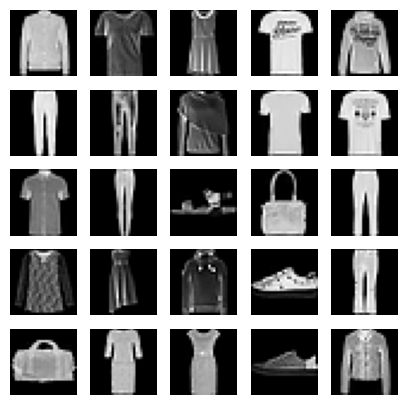

In [107]:
indexes = np.random.randint(0,x_test.shape[0], size=25)
images=x_test[indexes]
labels=y_test[indexes]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [108]:
model.predict(x_test[indexes])

1/1 [==============================] - 0s 207ms/step


array([[3.94374947e-04, 2.47652309e-07, 4.65742983e-02, 5.31341029e-05,
        4.04274404e-01, 9.90335252e-07, 5.48622906e-01, 9.02226276e-08,
        7.93905783e-05, 5.52698154e-08],
       [9.27461684e-01, 7.44141149e-09, 1.06942760e-04, 9.10665904e-07,
        1.48588981e-07, 2.33756681e-10, 7.24302083e-02, 5.65234873e-11,
        2.07200657e-08, 6.49497593e-08],
       [3.43426061e-03, 1.15670927e-03, 1.15268544e-04, 9.94190812e-01,
        2.92878340e-05, 9.17275031e-07, 1.05990283e-03, 8.54711107e-06,
        3.88246690e-06, 2.56333010e-07],
       [9.99214351e-01, 4.83136091e-08, 9.95719311e-05, 7.38502058e-05,
        2.78728095e-07, 1.90785845e-10, 6.11744588e-04, 1.77726410e-11,
        2.00443111e-07, 5.52980550e-09],
       [5.34572646e-05, 2.11269025e-07, 1.39926001e-01, 1.55652178e-05,
        8.52120280e-01, 1.56179865e-07, 7.86444545e-03, 6.80334145e-09,
        1.97827740e-05, 9.04744002e-10],
       [1.08974029e-06, 9.99995410e-01, 5.58970861e-08, 1.43792511e-06,
   